# Transient diffusion - PDE

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 20  
L = 1.0
X = np.linspace(0, L, N) 
h = L / (N - 1)         

C0_t = 0.1  
D = 0.02

t_final = 50.0
Ntsteps = 1000
dt = t_final / (Ntsteps - 1)
t = np.linspace(0, t_final, Ntsteps)

alpha = D * dt / h**2
print (alpha)

0.36136136136136143


FileNotFoundError: [Errno 2] No such file or directory: 'images/transient-diffusion-temporal-dependence.png'

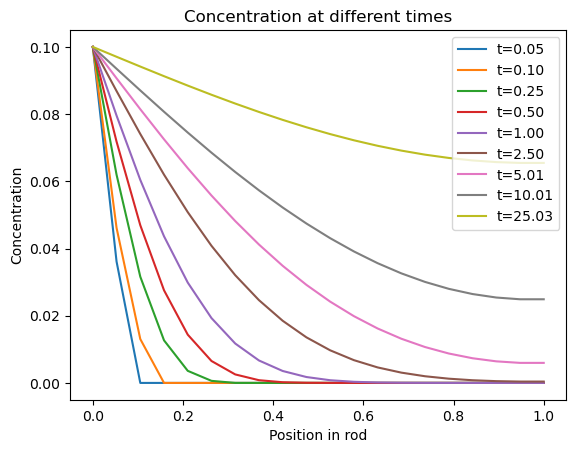

In [9]:
C_xt = [] # container for all the time steps

# initial condition at t = 0
C = np.zeros(X.shape)
C[0] = C0_t

C_xt += [C]

for j in range(1, Ntsteps):
    N = np.zeros(C.shape)
    N[0] =  C0_t
    N[1:-1] = alpha*C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[0:-2]
    N[-1] = N[-2]  # derivative boundary condition flux = 0
    C[:] = N
    C_xt += [N]

    # plot selective solutions
    if j in [1,2,5,10,20,50,100,200,500]:
        plt.plot(X, N, label='t={0:1.2f}'.format(t[j]))

plt.xlabel('Position in rod')
plt.ylabel('Concentration')
plt.title('Concentration at different times')
plt.legend(loc='best')
plt.savefig('images/transient-diffusion-temporal-dependence.png')

C_xt = np.array(C_xt)
plt.figure()
plt.plot(t, C_xt[:,5], label='x={0:1.2f}'.format(X[5]))
plt.plot(t, C_xt[:,10], label='x={0:1.2f}'.format(X[10]))
plt.plot(t, C_xt[:,15], label='x={0:1.2f}'.format(X[15]))
plt.plot(t, C_xt[:,19], label='x={0:1.2f}'.format(X[19]))
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.savefig('images/transient-diffusion-position-dependence.png')

plt.show()

the alpha value is: 0.36136136136136143


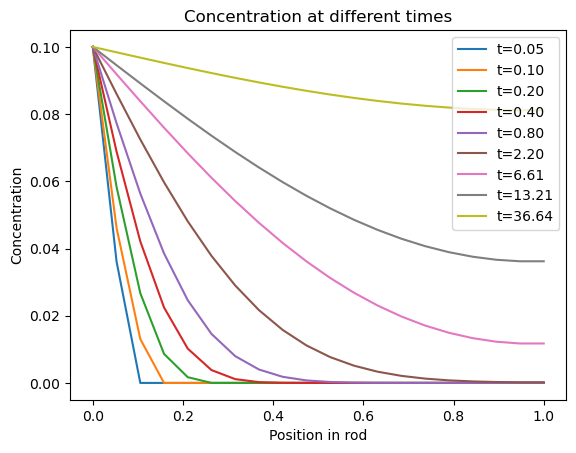

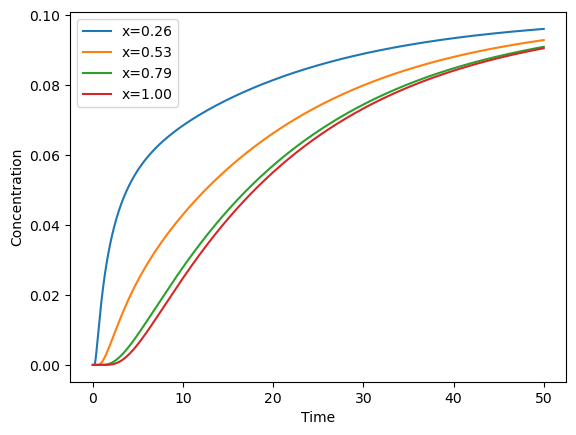

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 20  
L = 1.0
X = np.linspace(0, L, N)  
h = L / (N - 1)  

C0_t = 0.1 
D = 0.02

t_final = 50.0
Ntsteps = 1000
dt = t_final / (Ntsteps - 1)
t = np.linspace(0, t_final, Ntsteps)

alpha = D * dt / h**2

print('the alpha value is:', alpha)

C_xt = []  

# initial condition at t = 0
C = np.zeros(X.shape)
C[0] = C0_t

C_xt.append(C.copy())

for j in range(1, Ntsteps):
    new_C = np.zeros(C.shape)
    new_C[0] = C0_t
    new_C[1:-1] = alpha * C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[:-2]
    new_C[-1] = new_C[-2]  # zero flux boundary condition at x = L
    C[:] = new_C
    C_xt.append(new_C.copy())

    # plot selective solutions
    if j in [1, 2, 4, 8, 16, 44, 132, 264, 732]:
        plt.plot(X, new_C, label='t={0:1.2f}'.format(t[j]))

plt.xlabel('Position in rod')
plt.ylabel('Concentration')
plt.title('Concentration at different times')
plt.legend(loc='best')
plt.savefig('transient-diffusion-temporal-dependence.png')
plt.show()

C_xt = np.array(C_xt)
plt.figure()
plt.plot(t, C_xt[:, 5], label='x={0:1.2f}'.format(X[5]))
plt.plot(t, C_xt[:, 10], label='x={0:1.2f}'.format(X[10]))
plt.plot(t, C_xt[:, 15], label='x={0:1.2f}'.format(X[15]))
plt.plot(t, C_xt[:, 19], label='x={0:1.2f}'.format(X[19]))
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.savefig('transient-diffusion-position-dependence.png')
plt.show()
